In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')  # Ignoring warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("defects_data.csv")

# Display basic information about the dataset
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
if missing_values.any():
    print("Missing values detected in the dataset:")
    print(missing_values)
    
    # Fill missing values with the mean of each column
    df.fillna(df.mean(), inplace=True)
    print("Missing values have been filled with column means.")
else:
    print("No missing values detected in the dataset.")

# Drop irrelevant columns
df = df.drop(columns=['defect_id', 'product_id'])

# Encode categorical target variable
label_encoder = LabelEncoder()
df['severity'] = label_encoder.fit_transform(df['severity'])

# Separate features and target
X = df.drop(columns=['severity'])
y = df['severity']

# Define categorical and numerical features
categorical_features = ['defect_type', 'defect_date', 'defect_location', 'inspection_method']
numerical_features = ['repair_cost']

# Apply One-Hot Encoding to categorical features and scale numerical features
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

X_transformed = column_transformer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

print(df.head())

print("Preprocessing complete. Data is ready for modeling!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB
None
No missing values detected in the dataset.
  defect_type defect_date defect_location  severity  inspection_method  \
0  Structural    6/6/2024       Component         1  Visual Inspection   
1  Functional   4/26/2024       Component         1  Visual Inspection   
2  Structural   2/15/2024        Internal         1  Automated Testing   
3  Funct

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

# Remove label encoding if not needed for regression
# (Only use this if severity is numeric or ordinal)
label_encoder = LabelEncoder()
df['severity'] = label_encoder.fit_transform(df['severity'])  # Keep this only if severity is ordinal/numeric

# Separate features and target
X = df.drop(columns=['severity'])
y = df['severity']

# Define categorical and numerical features
categorical_features = ['defect_type', 'defect_date', 'defect_location', 'in spection_method']
numerical_features = ['repair_cost']

# Apply One-Hot Encoding to categorical features and scale numerical features
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

X_transformed = column_transformer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# R^2 Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Approximating classification accuracy (round predictions to nearest label if label encoding was used)
y_train_pred_rounded = np.round(y_train_pred)
y_test_pred_rounded = np.round(y_test_pred)

train_accuracy = accuracy_score(y_train, y_train_pred_rounded)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

# Print metrics
print(f"Training Accuracy (rounded): {train_accuracy:.4f}")
print(f"Testing Accuracy (rounded): {test_accuracy:.4f}")
print(f"R² Score (Train): {r2_train:.4f}")
print(f"R² Score (Test): {r2_test:.4f}")
print(f"Mean Squared Error (Test): {mean_squared_error(y_test, y_test_pred):.4f}")


Training Accuracy (rounded): 0.8950
Testing Accuracy (rounded): 0.4000
R² Score (Train): 0.8366
R² Score (Test): -0.2598
Mean Squared Error (Test): 0.7367


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB
None
No missing values detected.
Training Accuracy: 0.8988
Testing Accuracy: 0.3300

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.26      0.33      0.29        60
           1       0.42      0.41      0.42        83
           2       0.27      0.21      0.24        57

    accuracy       

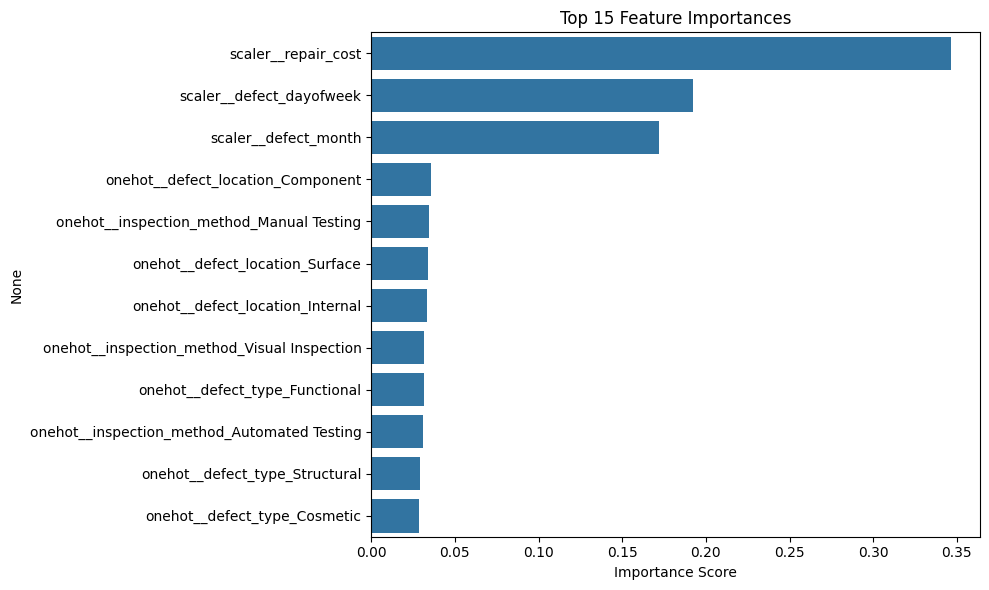

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("defects_data.csv")

# Display basic info
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
if missing_values.any():
    print("Missing values detected:")
    print(missing_values)
    df.fillna(df.mean(numeric_only=True), inplace=True)
    print("Missing values filled with column means.")
else:
    print("No missing values detected.")

# Drop irrelevant columns
df = df.drop(columns=['defect_id', 'product_id'])

# Convert defect_date to datetime and extract features
df['defect_date'] = pd.to_datetime(df['defect_date'], errors='coerce')
df['defect_month'] = df['defect_date'].dt.month
df['defect_dayofweek'] = df['defect_date'].dt.dayofweek
df.drop(columns=['defect_date'], inplace=True)

# Encode categorical target variable (if not already numeric)
df['severity'] = df['severity'].astype(str)
label_encoder = LabelEncoder()
df['severity'] = label_encoder.fit_transform(df['severity'])

# Separate features and target
X = df.drop(columns=['severity'])
y = df['severity']

# Identify feature types
categorical_features = ['defect_type', 'defect_location', 'inspection_method']
numerical_features = ['repair_cost', 'defect_month', 'defect_dayofweek']

# One-hot encode categorical features and scale numerical ones
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

X_transformed = column_transformer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

clf.fit(X_train, y_train)

# Predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluation
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# (Optional) Feature importance
importances = clf.feature_importances_
feature_names = column_transformer.get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
